# Compare the weekly statistics (mean, median, mode) for number of Cases and Deaths across US

## Import pandas to read the excel data, Plotly to graph the data, and Image to use static images

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from IPython.display import Image
import math

## Read the Cases dataset using pandas



In [2]:
cases = pd.read_csv('../covid_confirmed_usafacts.csv')
cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


## Read the Deaths dataset using pandas

In [3]:
deaths = pd.read_csv("../covid_deaths_usafacts.csv")
deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


## Since COVID dataset is huge, we will focus the analysis on selected dates, starts from 2020, July - 2020, December for the Cases dataset

In [4]:
selected_date_columns = [col for col in cases.columns if '2020-07-01' <= col <= '2020-12-31']
additional_columns = ["countyFIPS", "County Name", "State", "StateFIPS"]
selected_columns = additional_columns + selected_date_columns
selected_cases = cases[selected_columns]

selected_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,553,561,568,591,615,618,...,3841,3889,3942,3990,3999,4029,4065,4105,4164,4190
2,1003,Baldwin County,AL,1,703,751,845,863,881,911,...,12155,12321,12521,12666,12708,12825,12962,13172,13392,13601
3,1005,Barbour County,AL,1,326,335,348,350,352,356,...,1363,1383,1390,1396,1398,1406,1417,1462,1492,1514
4,1007,Bibb County,AL,1,174,179,189,190,193,197,...,1660,1683,1711,1725,1739,1746,1762,1792,1817,1834


## Create a series/array of sum of cases on each Wednesday from each week across United States

In [5]:
# July 1, 2020 is a Wednesday
count = 2
weekly_cases_us = [] # where Wednesday from each week is chosen
for col in selected_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_us.append(selected_cases[col].sum())
weekly_cases_us_data = pd.Series(weekly_cases_us)

## Plot the number of Cases across the United States

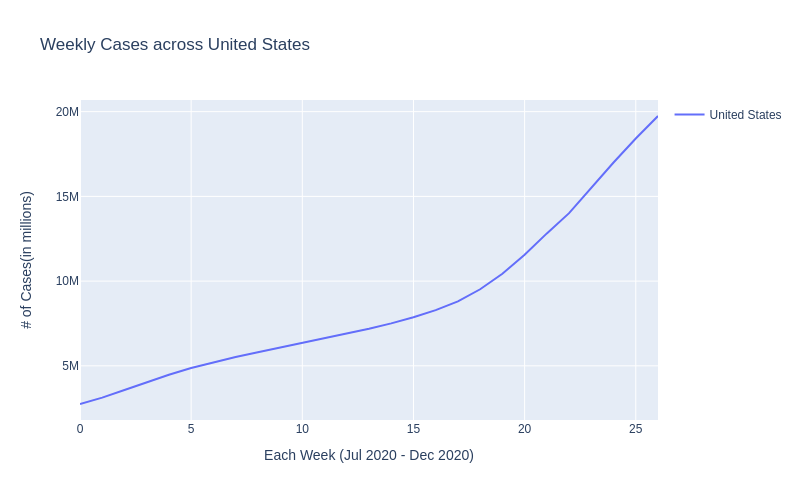

In [6]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=weekly_cases_us_data.index, y=weekly_cases_us_data,
                         mode='lines', name='United States'))

fig.update_layout(
    title='Weekly Cases across United States',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title='# of Cases(in millions)'),
    showlegend=True,
    width=800,
    height=500
)

fig.write_image("us_cases.png")
Image(filename="us_cases.png")

## Generate the Mean for the number of cases across United States

In [7]:
print("The Average/Mean of Cases across United States from July 2020 to December 2020 is",round(weekly_cases_us_data.mean(), 2))

The Average/Mean of Cases across United States from July 2020 to December 2020 is 8665222.44


## Generate the Mode for the number of cases across United States

In [8]:
print("The Mode of Cases across North Carolina from July 2020 to December 2020 is:",weekly_cases_us_data.mode().values[0])

The Mode of Cases across North Carolina from July 2020 to December 2020 is: 2748327


## Generate the Median for the number of cases across United States

In [9]:
print("The Median of Cases across North Carolina from July 2020 to December 2020 is:",int(weekly_cases_us_data.median()))

The Median of Cases across North Carolina from July 2020 to December 2020 is: 7191626


## Since COVID dataset is huge, we will focus the analysis on selected dates, starts from 2020, July - 2020, December for the Deaths dataset

In [10]:
selected_date_columns = [col for col in deaths.columns if '2020-07-01' <= col <= '2020-12-31']
additional_columns = ["countyFIPS", "County Name", "State", "StateFIPS"]
selected_columns = additional_columns + selected_date_columns
selected_deaths = deaths[selected_columns]

selected_deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,12,13,13,13,13,13,...,44,46,46,46,46,47,47,47,48,48
2,1003,Baldwin County,AL,1,10,10,10,10,10,10,...,149,151,151,151,151,152,152,156,160,161
3,1005,Barbour County,AL,1,1,1,2,2,2,2,...,32,32,32,32,32,32,32,32,32,32
4,1007,Bibb County,AL,1,1,1,1,1,1,1,...,42,42,42,42,42,42,42,42,46,46


## Create a series/array of sum of deaths on each Wednesday from each week across United States

In [11]:
# July 1, 2020 is a Wednesday
count = 2
weekly_deaths_us = [] # where Wednesday from each week is chosen
for col in selected_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_us.append(selected_deaths[col].sum())
weekly_deaths_us_data = pd.Series(weekly_deaths_us)

## Plot the number of Deaths across the United States

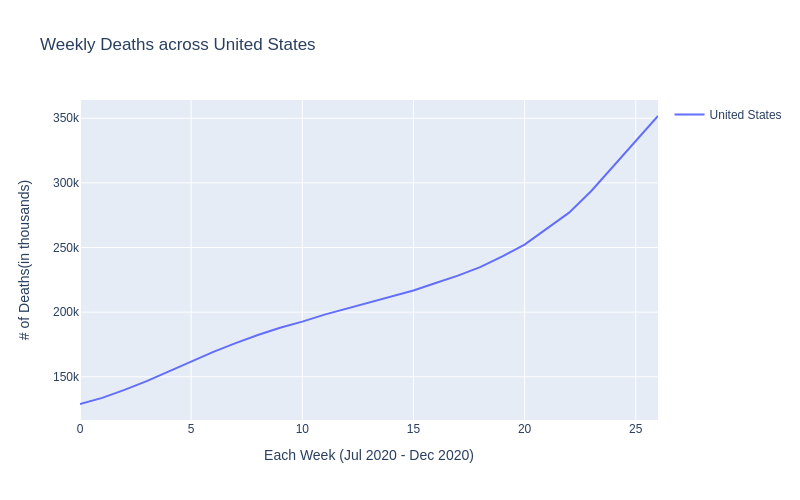

In [12]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=weekly_deaths_us_data.index, y=weekly_deaths_us_data,
                         mode='lines', name='United States'))

fig.update_layout(
    title='Weekly Deaths across United States',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title='# of Deaths(in thousands)'),
    showlegend=True,
    width=800,
    height=500
)

fig.write_image("us_deaths.png")
Image(filename="us_deaths.png")

## Generate the Mean for the number of deaths across the United States

In [13]:
print("The Average/Mean of Deaths across the United States from July 2020 to December 2020 is",round(weekly_deaths_us_data.mean(), 2))

The Average/Mean of Deaths across the United States from July 2020 to December 2020 is 215681.96


## Generate the Mode for the number of deaths across the United States

In [14]:
print("The Mode of Deaths across the United States from July 2020 to December 2020 is:",weekly_deaths_us_data.mode().values[0])

The Mode of Deaths across the United States from July 2020 to December 2020 is: 128962


## Generate the Median for the number of deaths across United States

In [15]:
print("The Median of Deaths across the United States from July 2020 to December 2020 is:",int(weekly_deaths_us_data.median()))

The Median of Deaths across the United States from July 2020 to December 2020 is: 207510


#### Picking the five countries in the world to compare to the US.

In [16]:
super_countries_dataset = pd.read_csv("../super_countries_covid_data.csv")

# Five Chosen Countries
five_countries = ["United Kingdom", "Germany", "India", "Spain", "France"]

cleaned_countries_dataset = super_countries_dataset[["continent", "location", "date", "new_cases", "total_cases", "new_deaths", "total_deaths", "population"]]
five_countries_filter = cleaned_countries_dataset["location"].isin(five_countries)
five_countries_dataset = cleaned_countries_dataset[five_countries_filter]

# Convert date to be dtype datetime instead of object for comparison allowance
five_countries_dataset['date'] = pd.to_datetime(five_countries_dataset['date'], utc=False)
dates_filter = (five_countries_dataset['date'] >= '7/1/2020') & (five_countries_dataset['date'] <= '12/31/2020')
five_countries_dataset = five_countries_dataset[dates_filter]
five_countries_dataset



/tmp/ipykernel_263619/262373720.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,continent,location,date,new_cases,total_cases,new_deaths,total_deaths,population
104335,Europe,France,2020-07-01,0.0,18132.0,0.0,19322.0,67813000.0
104336,Europe,France,2020-07-02,0.0,18132.0,0.0,19322.0,67813000.0
104337,Europe,France,2020-07-03,0.0,18132.0,0.0,19322.0,67813000.0
104338,Europe,France,2020-07-04,0.0,18132.0,0.0,19322.0,67813000.0
104339,Europe,France,2020-07-05,2324.0,20456.0,100.0,19422.0,67813000.0
...,...,...,...,...,...,...,...,...
325197,Europe,United Kingdom,2020-12-27,14419.0,2344433.0,655.0,90475.0,67508936.0
325198,Europe,United Kingdom,2020-12-28,41110.0,2385543.0,691.0,91166.0,67508936.0
325199,Europe,United Kingdom,2020-12-29,48520.0,2434063.0,717.0,91883.0,67508936.0
325200,Europe,United Kingdom,2020-12-30,46408.0,2480471.0,722.0,92605.0,67508936.0


#### Comparisons happening here:

/tmp/ipykernel_263619/2223876535.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



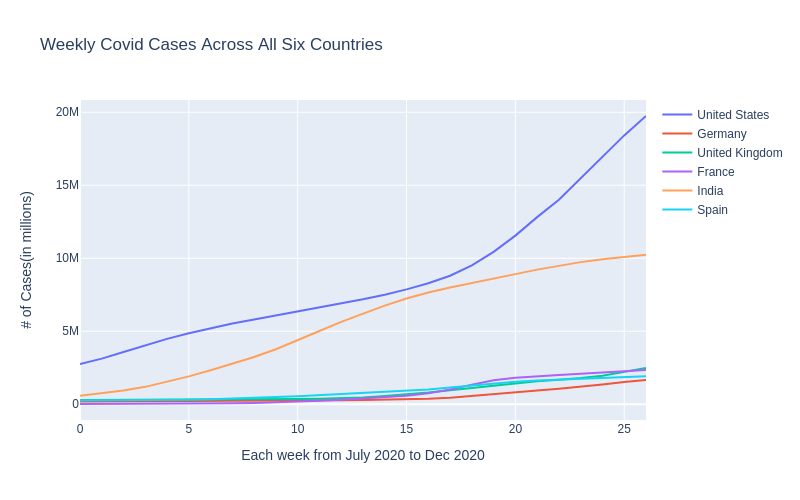

In [17]:

dates = five_countries_dataset.date.dt.strftime("%Y-%m-%d").unique()

weekly_datasets_cases = {"Germany": [], "United Kingdom": [], "France": [], "India": [], "Spain": []}
weekly_datasets_deaths = {"Germany": [], "United Kingdom": [], "France": [], "India": [], "Spain": []}

for country in five_countries:
  for i in range(0, math.ceil(len(dates)/7)):
    date_frame = five_countries_dataset[five_countries_dataset["location"] == country][five_countries_dataset["date"] == dates[i*7]]
    weekly_datasets_cases[country].append(date_frame["total_cases"].values[0])
    weekly_datasets_deaths[country].append(date_frame["total_deaths"].values[0])

country_cases = pd.DataFrame({
  "United States": weekly_cases_us_data,
  "Germany": pd.Series(weekly_datasets_cases["Germany"]),
  "United Kingdom": pd.Series(weekly_datasets_cases["United Kingdom"]),
  "France": pd.Series(weekly_datasets_cases["France"]),
  "India": pd.Series(weekly_datasets_cases["India"]),
  "Spain": pd.Series(weekly_datasets_cases["Spain"])
})

fig = go.Figure()
for country in country_cases.columns:
    fig.add_trace(go.Scatter(x=country_cases.index, y=country_cases[country], mode='lines', name=country))
fig.update_layout(
    title='Weekly Covid Cases Across All Six Countries',
    xaxis=dict(title='Each week from July 2020 to Dec 2020'),
    yaxis=dict(title='# of Cases(in millions)'),
    showlegend=True,
    width=800,
    height=500 
)

fig.write_image("five_countries_comparison_cases.png")
Image(filename="five_countries_comparison_cases.png")

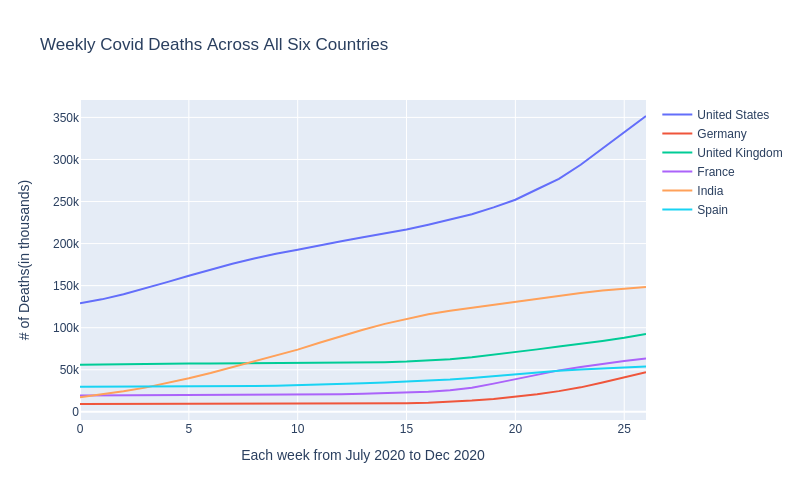

In [18]:
country_deaths = pd.DataFrame({
  "United States": weekly_deaths_us_data,
  "Germany": pd.Series(weekly_datasets_deaths["Germany"]),
  "United Kingdom": pd.Series(weekly_datasets_deaths["United Kingdom"]),
  "France": pd.Series(weekly_datasets_deaths["France"]),
  "India": pd.Series(weekly_datasets_deaths["India"]),
  "Spain": pd.Series(weekly_datasets_deaths["Spain"])
})

fig = go.Figure()
for country in country_deaths.columns:
    fig.add_trace(go.Scatter(x=country_deaths.index, y=country_deaths[country], mode='lines', name=country))
fig.update_layout(
    title='Weekly Covid Deaths Across All Six Countries',
    xaxis=dict(title='Each week from July 2020 to Dec 2020'),
    yaxis=dict(title='# of Deaths(in thousands)'),
    showlegend=True,
    width=800,
    height=500 
)

fig.write_image("five_countries_comparison_deaths.png")
Image(filename="five_countries_comparison_deaths.png")

Let's normalise them by population.


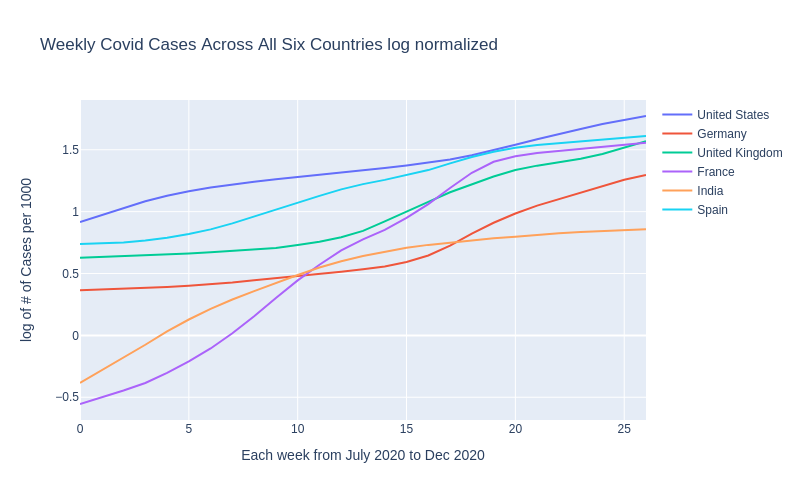

In [19]:
country_cases_normalized = pd.DataFrame({
  "United States": country_cases["United States"] / 333000,
  "Germany": country_cases["Germany"] / 84000,
  "United Kingdom": country_cases["United Kingdom"] / 67000,
  "France": country_cases["France"] / 65000,
  "India":country_cases["India"] / 1420000,
  "Spain": country_cases["Spain"] / 47000
})

fig = go.Figure()
for country in country_cases_normalized.columns:
    fig.add_trace(go.Scatter(x=country_cases_normalized.index, y=np.log10(country_cases_normalized[country]), mode='lines', name=country))
fig.update_layout(
    title='Weekly Covid Cases Across All Six Countries log normalized',
    xaxis=dict(title='Each week from July 2020 to Dec 2020'),
    yaxis=dict(title='log of # of Cases per 1000'),
    showlegend=True,
    width=800,
    height=500 
)

fig.write_image("five_countries_comparison_cases_norm.png")
Image(filename="five_countries_comparison_cases_norm.png")

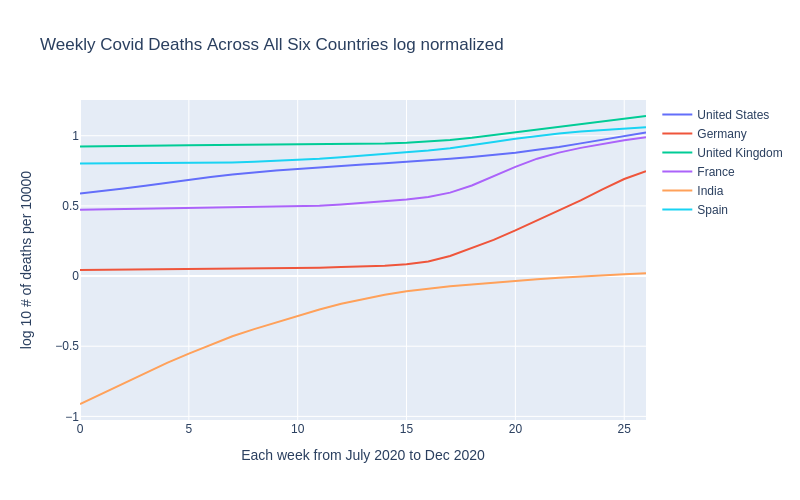

In [20]:
country_deaths_normalized = pd.DataFrame({
  "United States": country_deaths["United States"] / 33300,
  "Germany": country_deaths["Germany"] / 8400,
  "United Kingdom": country_deaths["United Kingdom"] / 6700,
  "France": country_deaths["France"] / 6500,
  "India":country_deaths["India"] / 142000,
  "Spain": country_deaths["Spain"] / 4700
})

fig = go.Figure()
for country in country_deaths_normalized.columns:
    fig.add_trace(go.Scatter(x=country_deaths_normalized.index, y=np.log10(country_deaths_normalized[country]), mode='lines', name=country))
fig.update_layout(
    title='Weekly Covid Deaths Across All Six Countries log normalized',
    xaxis=dict(title='Each week from July 2020 to Dec 2020'),
    yaxis=dict(title='log 10 # of deaths per 10000'),
    showlegend=True,
    width=800,
    height=500 
)

fig.write_image("five_countries_comparison_deaths_norm.png")
Image(filename="five_countries_comparison_deaths_norm.png")

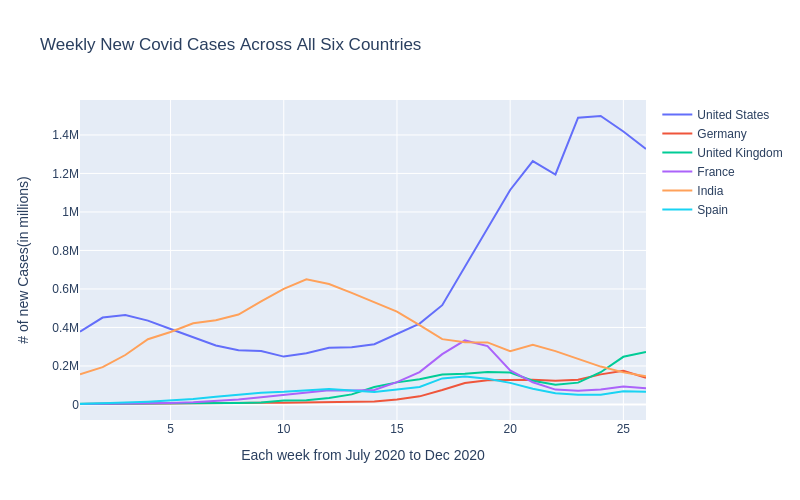

In [21]:
diff_case = country_cases.diff().dropna()

fig = go.Figure()
for country in diff_case.columns:
    fig.add_trace(go.Scatter(x=diff_case.index, y=diff_case[country], mode='lines', name=country))
fig.update_layout(
    title='Weekly New Covid Cases Across All Six Countries',
    xaxis=dict(title='Each week from July 2020 to Dec 2020'),
    yaxis=dict(title='# of new Cases(in millions)'),
    showlegend=True,
    width=800,
    height=500 
)

fig.write_image("five_countries_comparison_diff_cases.png")
Image(filename="five_countries_comparison_diff_cases.png")

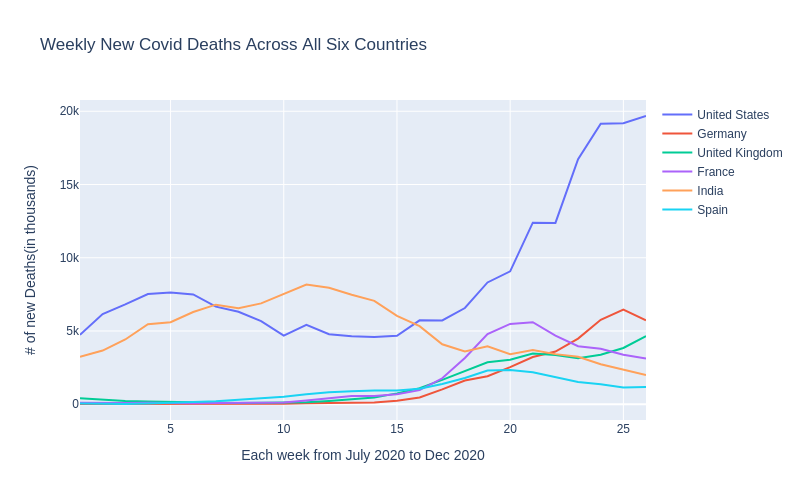

In [22]:
diff_deaths = country_deaths.diff().dropna()

fig = go.Figure()
for country in diff_deaths.columns:
    fig.add_trace(go.Scatter(x=diff_deaths.index, y=diff_deaths[country], mode='lines', name=country))
fig.update_layout(
    title='Weekly New Covid Deaths Across All Six Countries',
    xaxis=dict(title='Each week from July 2020 to Dec 2020'),
    yaxis=dict(title='# of new Deaths(in thousands)'),
    showlegend=True,
    width=800,
    height=500 
)

fig.write_image("five_countries_comparison_diff_deaths.png")
Image(filename="five_countries_comparison_diff_deaths.png")

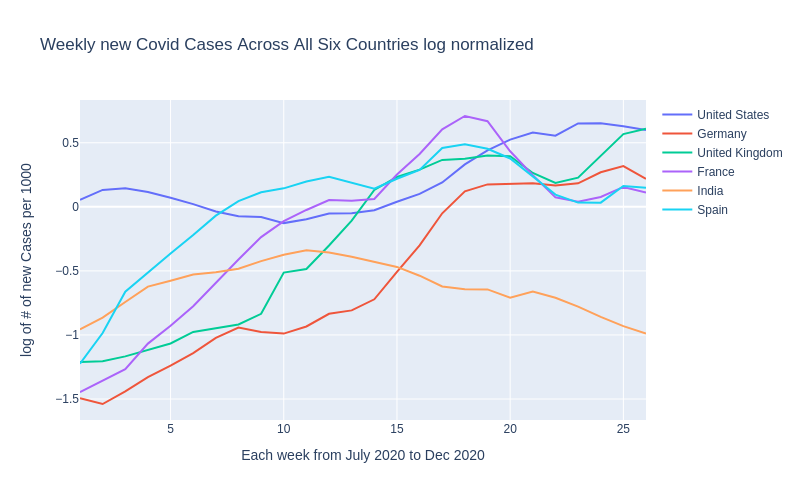

In [23]:
diff_case_normalized = pd.DataFrame({
  "United States": diff_case["United States"] / 333000,
  "Germany": diff_case["Germany"] / 84000,
  "United Kingdom": diff_case["United Kingdom"] / 67000,
  "France": diff_case["France"] / 65000,
  "India": diff_case["India"] / 1420000,
  "Spain": diff_case["Spain"] / 47000
})

fig = go.Figure()
for country in diff_case_normalized.columns:
    fig.add_trace(go.Scatter(x=diff_case_normalized.index, y=np.log10(diff_case_normalized[country]), mode='lines', name=country))
fig.update_layout(
    title='Weekly new Covid Cases Across All Six Countries log normalized',
    xaxis=dict(title='Each week from July 2020 to Dec 2020'),
    yaxis=dict(title='log of # of new Cases per 1000'),
    showlegend=True,
    width=800,
    height=500 
)

fig.write_image("five_countries_comparison_diff_cases_norm.png")
Image(filename="five_countries_comparison_diff_cases_norm.png")

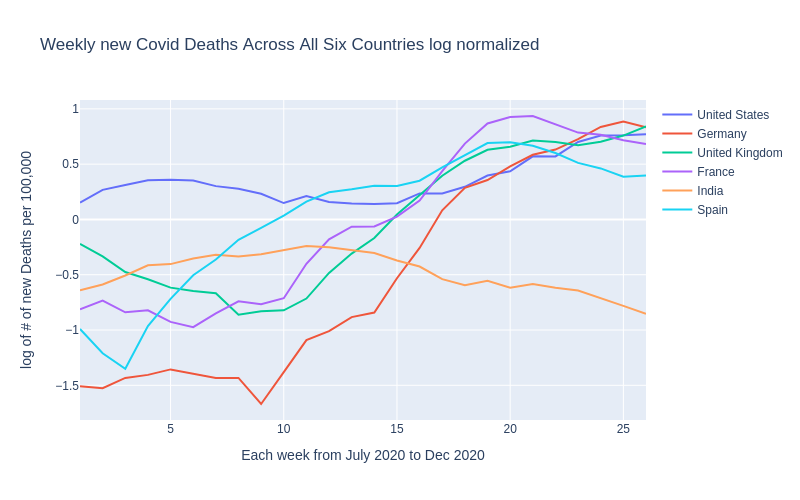

In [24]:
diff_death_normalized = pd.DataFrame({
  "United States": diff_deaths["United States"] / 3330,
  "Germany": diff_deaths["Germany"] / 840,
  "United Kingdom": diff_deaths["United Kingdom"] / 670,
  "France": diff_deaths["France"] / 650,
  "India": diff_deaths["India"] / 14200,
  "Spain": diff_deaths["Spain"] / 470
})

fig = go.Figure()
for country in diff_death_normalized.columns:
    fig.add_trace(go.Scatter(x=diff_death_normalized.index, y=np.log10(diff_death_normalized[country]), mode='lines', name=country))
fig.update_layout(
    title='Weekly new Covid Deaths Across All Six Countries log normalized',
    xaxis=dict(title='Each week from July 2020 to Dec 2020'),
    yaxis=dict(title='log of # of new Deaths per 100,000'),
    showlegend=True,
    width=800,
    height=500 
)

fig.write_image("five_countries_comparison_diff_deaths_norm.png")
Image(filename="five_countries_comparison_diff_deaths_norm.png")